In [54]:
# Setting
## The path & packages
'upload'
#### Draft um Gitupload
!git init 
!git add . 
!git commit -m "3.3.2 Mann U Test for Univariate Analysis"
!git push

Reinitialized existing Git repository in C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/.git/


The file will have its original line endings in your working directory


[main 5a93e71] 3.3.2 Mann U Test for Univariate Analysis
 1 file changed, 249 insertions(+), 308 deletions(-)


To https://github.com/danIBK/SE_Risk_Management.git
   811f90a..5a93e71  main -> main


In [143]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [144]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)


checking the data

In [145]:
df_train.head()

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,37831990.81,17111465.66,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4669178.63,927837.74,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,28101189.79,11116958.92,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8238473.86,7519183.22,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,35465651.58,8545183.94,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80


In [146]:
df_test.head(8)

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,728946.68,728946.68,209721.36,45390.50,...,NaN,NaN,64195.98,28659.19,5598.17,NaN,NaN,52632.64,-534.87,-5.457891e+04
C_896,GmbH,13127,87100,1992,181.0,GKV,708847.33,708847.33,738495.17,13017.29,...,NaN,442875.57,479144.25,452033.96,442835.62,NaN,NaN,-10575.21,-1295.42,-5.820000e-11
C_252,GmbH,14059,86101,1993,505.0,GKV,26025323.61,26015542.03,22022993.85,2086104.36,...,NaN,13733666.50,14504753.93,3441491.02,322075.13,3034766.29,NaN,2862349.65,-667342.46,-2.091456e+06
C_165,GmbH,10437,87100,1995,82.0,GKV,1105332.48,1105332.48,717405.05,88074.80,...,NaN,381990.95,371506.04,343269.12,256395.19,NaN,NaN,156251.71,-57344.11,-1.160000e-10
C_856,GmbH,14943,96090,2002,22.0,GKV,51995424.22,51979901.95,46420844.34,5956777.13,...,NaN,6828494.53,18909648.90,15619860.60,6720068.91,8847966.22,NaN,5696079.15,-1418555.39,-4.163971e+06
C_415,GmbH,10969,68321,2006,NaN,GKV,13597456.35,13597456.35,7667501.25,-109859.68,...,NaN,0.00,1273354.65,1277275.04,5848.43,136628.62,NaN,83600.84,1560281.10,-1.643803e+06
C_520,GmbH,10625,68100,2010,NaN,GKV,10365544.05,10365544.05,7931366.20,565338.94,...,NaN,8823433.07,7715921.82,7749440.79,6802934.01,855343.08,NaN,1051697.31,-366425.37,-5.398260e+03
C_127,GmbH,29308,87100,2007,NaN,GKV,10129943.12,10486827.90,5959584.15,435328.26,...,NaN,1990015.77,3451499.64,1352994.01,1349.09,986648.60,NaN,-56012.29,-533257.11,4.586848e+05


# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

### Transforming year_inc to age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

In [147]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,635769.95,635769.95,...,37125.13,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,2020
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,241456.04,216900.58,...,514698.88,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,2020
272,C_543,0,AG,86150,68101,1464,NaN,GKV,73165008.12,73165008.12,...,7797900.20,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,556
249,C_105,0,AG,76185,70101,1856,NaN,GKV,53372139.09,53110170.33,...,7522638.74,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,164
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2713538.03,2713538.03,...,330130.46,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,163


As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [148]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
272,C_543,0,AG,86150,68101,1464,NaN,GKV,7.316501e+07,7.316501e+07,...,7.797900e+06,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,157.32
249,C_105,0,AG,76185,70101,1856,NaN,GKV,5.337214e+07,5.311017e+07,...,7.522639e+06,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,157.32
371,C_361,0,GmbH,21335,20520,1858,185.0,GKV,1.979305e+08,1.972723e+08,...,2.445527e+06,32809291.04,24618777.77,1012.13,24452421.93,NaN,11658956.29,-1.072492e+06,-1.088165e+07,157.32
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,6.357699e+05,6.357699e+05,...,3.712513e+04,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,157.32
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,2.414560e+05,2.169006e+05,...,5.146989e+05,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,157.32
283,C_519,0,GmbH,80807,18120,1862,NaN,GKV,1.560010e+06,4.462166e+06,...,3.912989e+05,1780853.40,507526.40,13989.13,NaN,NaN,-115009.30,-6.533309e+04,2.707314e+05,157.32
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2.713538e+06,2.713538e+06,...,3.301305e+05,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,157.32
454,C_259,0,Freiberufler,44141,94110,1863,140.0,GKV,3.584665e+05,3.584665e+05,...,1.871424e+05,70476.90,61735.26,41618.21,NaN,NaN,22009.92,-1.400000e+05,1.307238e+05,157.00
165,C_347,0,GmbH,57072,25993,1866,116.0,GKV,2.645000e+05,2.645000e+05,...,1.834052e+04,186602.25,172230.65,1434.82,NaN,NaN,1484.67,4.500000e+01,0.000000e+00,154.00
445,C_019,0,AG,33689,70109,1870,107.0,GKV,2.432905e+06,2.432905e+06,...,-3.640000e-12,340903.37,340903.37,340903.37,NaN,NaN,1933900.10,0.000000e+00,-2.050780e+06,150.00


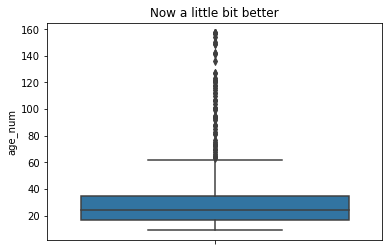

In [149]:
sns.boxplot(y=df_train["age_num"]).set_title("Now a little bit better");

AttributeError: module 'seaborn' has no attribute 'displot'

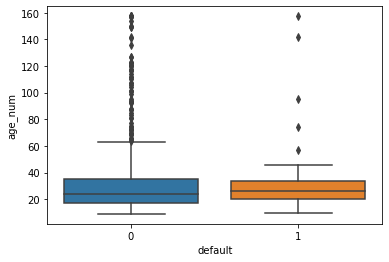

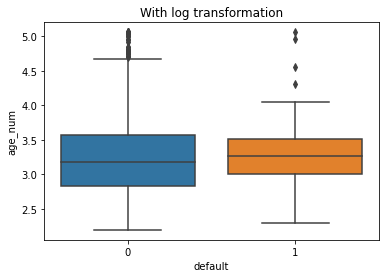

<Figure size 432x288 with 0 Axes>

In [150]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

In [151]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(8.999, 12.0]","(12.0, 15.0]","(15.0, 19.0]","(19.0, 22.0]","(22.0, 24.0]","(24.0, 28.0]","(28.0, 31.0]","(31.0, 41.4]","(41.4, 65.0]","(65.0, 157.32]"
default,,,,,,,,,,
0,69,61,75,78,36,67,64,54,65,62
1,5,1,3,6,4,0,7,5,3,4


In [152]:
mdl = sm.Logit.from_formula('default ~ age_num + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.6596
Date:               2020-12-31 13:20 BIC:              304.6712
No. Observations:   669              Log-Likelihood:   -145.83 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.72592 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8762    0.2531  -11.3634  0.0000  -3.3723  -2.3801
age_num     0.0019    0.0054    0.3576  0.7206  -0.0087   0.0126



In [153]:
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 19, inclusive=True),
     df_train['age_num'].between(20, 29, inclusive=True),
     df_train['age_num'].between(30, 39, inclusive=True),
     df_train['age_num'].between(40, 49, inclusive=True),
     df_train['age_num'].between(50, 59, inclusive=True),
     df_train['age_num'].between(60, np.inf, inclusive=True)], 
    ['10-19','20-29','30-39','40-49','50-59','>59'],)

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,10-19,20-29,30-39,40-49,50-59,>59
default,,,,,,
0,205,206,81,44,27,68
1,9,12,10,2,1,4


In [154]:
mdl = sm.Logit.from_formula('default ~ age_cat + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.018   
Dependent Variable:  default          AIC:              298.5732
Date:                2020-12-31 13:20 BIC:              325.6079
No. Observations:    669              Log-Likelihood:   -143.29 
Df Model:            5                LL-Null:          -145.89 
Df Residuals:        663              LLR p-value:      0.39087 
Converged:           1.0000           Scale:            1.0000  
No. Iterations:      7.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        -3.1258   0.3406 -9.1781 0.0000 -3.7933 -2.4583
age_cat[T.20-29]  0.2828   0.4519  0.6259 0.5314 -0.6028  1.1684
age_cat[T.30-39]  1.0339   0.4778  2.1637 0.0305  0.0974  1.9705
age_cat[T.40-49]  0.0347   0.7992  0.0435 0.9653 -

In [155]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  id
---------------------------------------------------
           0    1  N_False  N_True  N  N_Perc
id                                           
C_995  100.0  0.0        1       0  1    0.15
C_994  100.0  0.0        1       0  1    0.15
C_992  100.0  0.0        1       0  1    0.15
C_990  100.0  0.0        1       0  1    0.15
C_986  100.0  0.0        1       0  1    0.15
...      ...  ...      ...     ... ..     ...
C_006  100.0  0.0        1       0  1    0.15
C_004  100.0  0.0        1       0  1    0.15
C_002  100.0  0.0        1       0  1    0.15
C_001  100.0  0.0        1       0  1    0.15
C_000  100.0  0.0        1       0  1    0.15

[669 rows x 6 columns]

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.2

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [156]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl', 'age_cat']

In [157]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing',
 'age_num']

## Missing values

Overview of missing values in the data

In [158]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          669
bonds_payables_st          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
total_assets                 1
earn_from_op                 1
annual_profit                1
sales                        1
current_assets               1
cf_operating                 1
cf_investment                1
cf_financing                 1
year_inc                     0
sector                       0
zip_code                     0
type_pl                      0
legal_fo

In [159]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [160]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: default          AIC:              294.4736
Date:               2020-12-31 13:20 BIC:              303.4851
No. Observations:   669              Log-Likelihood:   -145.24 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.25258 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       -3.1658    0.3671  -8.6249  0.0000  -3.8852  -2.4464
zip_code     0.0000    0.0000   1.1393  0.2546  -0.0000   0.0000

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: 


                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: default          AIC:              295.3412
Date:               2020-12-31 13:20 BIC:              304.3498
No. Observations:   668              Log-Likelihood:   -145.67 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.56907 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -2.8026   0.1671 -16.7705 0.0000 -3.1301 -2.4750
annual_profit  -0.0000   0.0000  -0.5205 0.6027 -0.0000  0.0000

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.008   
Dependent Variable: defa

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: default          AIC:              264.7221  
Date:               2020-12-31 13:20 BIC:              273.6356  
No. Observations:   637              Log-Likelihood:   -130.36   
Df Model:           1                LL-Null:          -138.40   
Df Residuals:       635              LLR p-value:      6.0787e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -2.4119     0.1926   -12.5247   0.0000   -2.7893   -2.0344
cash     -0.0000     0.0000    -2.0864   0.0369   -0.0000   -0.0000

                           Results: Logit
Model:                Logit              Pseudo R

In [161]:
pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")

,P-Value,NAs
cash,0.036941,32
year_inc,0.055606,0
total_equity,0.109640,21
gross_profit,0.153112,7
cf_operating,0.242710,1
bank_liabilities_lt,0.245019,545
zip_code,0.254582,0
total_liabilities_lt,0.259686,0
cf_investment,0.328421,1
total_assets,0.366245,1


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [162]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue

#sns.boxplot(x="default",y=np.log(df_train[col_list[6]]),data=df_train)

In [163]:
pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")

,Test statistic,P-Value,NAs
cash,7716.0,0.000111,32
trade_receivables_lt,8339.0,0.000805,645
trade_payables_lt,8430.0,0.001051,665
bonds_payables_st,8471.0,0.001183,669
bonds_payables_lt,8471.0,0.001183,669
monetary_current_assets,8712.0,0.002315,0
bonds_payables_mt,8855.0,0.003383,664
result_from_ord_bus,8910.0,0.003900,1
total_result,8993.0,0.004814,0
trade_payables_mt,9057.0,0.005645,648


# Variables

In [164]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

## 1. Single independent variables

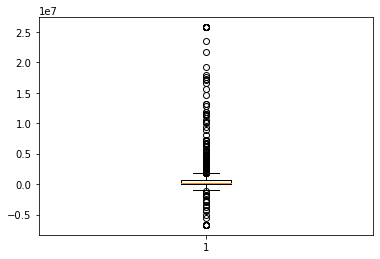

In [165]:
df_train['ebit'] = sci.stats.mstats.winsorize(tr['earn_from_op'], limits =[0.015, 0.015])
plt.boxplot(df_train.ebit)
plt.show()

In [169]:
print(df_train['cash'].describe())
#np.quantile(df_train['cash'].dropna(),.5)
print(df_train['cash'].isnull().sum())

df_train.loc[df_train['cash'].isnull(), 'cash'] = np.quantile(df_train['cash'].dropna(),.5)
print(df_train['cash'].value_counts()) #46 nulls
print(df_train['cash'].describe())

# plt.boxplot(df_train['cash'])
# plt.show()

count    6.680000e+02
mean     2.572136e+06
std      1.250278e+07
min      3.090000e+00
25%      2.031953e+04
50%      1.387784e+05
75%      9.784640e+05
max      2.562816e+08
Name: cash, dtype: float64
0
138778.38      32
154972.27       1
88932.47        1
6890565.23      1
3277843.17      1
               ..
6072.86         1
27710.98        1
14077.10        1
47322295.51     1
35.00           1
Name: cash, Length: 637, dtype: int64
count    6.680000e+02
mean     2.572136e+06
std      1.250278e+07
min      3.090000e+00
25%      2.031953e+04
50%      1.387784e+05
75%      9.784640e+05
max      2.562816e+08
Name: cash, dtype: float64


## 2. Predict NaN for total equity
Source: https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b


Check for correlation to get relevant variables for regression

In [79]:
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))


corr total eqity x total result: 0.8677428854384167
corr total eqity x total assets: 0.7973909460204517
corr total eqity x operating cash flow: 0.8165188337701584


Split training and prediction dataset

In [80]:
cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

Train model to fit dataset and predict missing values from column total equity and replace them

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 804154.57039482  826770.3743369   750108.4400077  2034060.76386615
  906958.71620787  757800.9886018   694739.75133316  777633.44217636
 1031927.82907443  707250.9930617   798206.66922869  753555.95951814
  938481.58223854  838818.88678533  728338.08877873  658229.22939662
  757045.94589862 3707034.78681172  430054.79880166  809294.10299164]


Replace the missing values with predicted values

In [82]:
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred

## 3. Financial ratios

We use two liquidity ratios (measure a companies ability to meet its short term dept obligations)

3.1. working capital ratio = current assets/current liabilities

0      5.142587
1      0.663710
2      3.328108
3      3.193566
4      0.102055
         ...   
664    0.835583
665    1.213142
666    0.041927
667    0.615002
668    1.006126
Name: wc_ratio, Length: 668, dtype: float64
count    668.000000
mean       2.468297
std        6.831628
min        0.000933
25%        0.785477
50%        1.177708
75%        1.929122
max       86.138329
Name: wc_ratio, dtype: float64


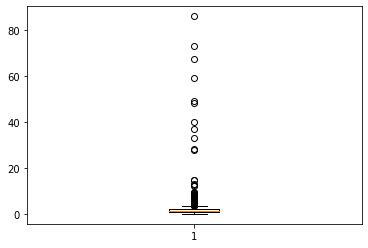

In [106]:
#create a column with total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']

df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
print(df_train.wc_ratio)
print(df_train.wc_ratio.describe())
plt.boxplot(df_train.wc_ratio)
plt.show()

3.2. operating cash flow ratio = operating cf/current liabilities

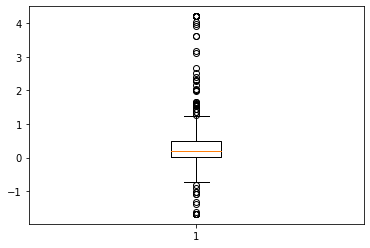

In [84]:
cf_pos = np.where(df_train['cf_operating'] > 1, df_train['cf_operating'], 0)
cf_neg = np.where(df_train['cf_operating'] < -1, df_train['cf_operating'], 0)
ocf = df_train['cf_operating']/df_train['total_liabilities_st']
# winsorize ocf
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(ocf, limits =[0.01, 0.015])
plt.boxplot(df_train.ocf_ratio)
plt.show()

Next we use two solvency ratio (measure a companies ability to meet its long term dept obligations) that we will weight as one to circumvent overfitting

3.3. equity ratio = tot equity/total assets

0      0.738567
1      0.389698
2      0.000937
3      0.592532
4      0.417496
         ...   
664    0.182336
665    0.341823
666    0.000000
667    0.000000
668    0.040729
Name: equity_ratio, Length: 668, dtype: float64
count    668.000000
mean       0.387833
std        0.579788
min        0.000000
25%        0.106484
50%        0.284663
75%        0.506833
max        9.221039
Name: equity_ratio, dtype: float64


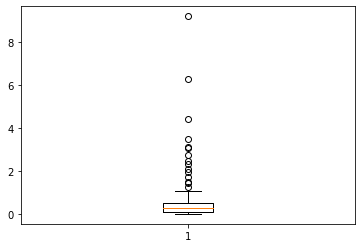

In [85]:
df_train['equity_ratio'] = np.where(df_train['total_equity'] > 1, df_train['total_equity']/df_train['total_assets'], 0)
print(df_train.equity_ratio)
print(df_train.equity_ratio.describe())
plt.boxplot(df_train.equity_ratio)
plt.show()

3.4. debt to equity ratio = total dept/total equity

count    668.000000
mean      13.456811
std       46.042526
min        0.000000
25%        0.591623
50%        1.908121
75%        5.358456
max      292.680000
Name: debt_to_equity, dtype: float64
0        0.352444
1        1.560542
2      163.778649
3        0.236311
4        1.329259
          ...    
664      4.484386
665      1.925494
666      0.000000
667      0.000000
668     23.541597
Name: debt_to_equity, Length: 668, dtype: float64
0.000000      46
292.680000    14
62.364752      1
14.363281      1
0.839126       1
              ..
163.778649     1
0.701921       1
5.923087       1
1.474352       1
87.495855      1
Name: debt_to_equity, Length: 610, dtype: int64


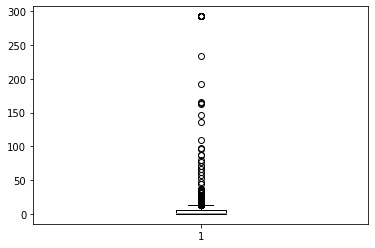

In [108]:
dte = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
df_train['debt_to_equity'] = sci.stats.mstats.winsorize(dte, limits =[0.0, 0.02])
print(df_train.debt_to_equity.describe())
print(df_train.debt_to_equity)
print(df_train.debt_to_equity.value_counts()) #46 nulls
plt.boxplot(df_train.debt_to_equity)
plt.show()

Create a dataframe with single ratios and financial ratios and a heatmap to check for correlation between ratios

          ebit         cash   wc_ratio  ocf_ratio  equity_ratio  \
0   6536077.55  10297047.50   5.142587   0.949635      0.738567   
1     38140.91    926383.75   0.663710  -0.617484      0.389698   
2     89799.80   9146283.79   3.328108   1.130863      0.000937   
3    584315.02   6890565.23   3.193566   0.665113      0.592532   
4  25753000.00   5036615.09   0.102055   0.374604      0.417496   
5     22382.91     75679.79  14.987767   3.180455      0.933551   
6  25753000.00  11542490.91   0.834046   0.394165      0.648681   
7  -6707113.13  21696000.00   1.483001   2.055528      0.900519   
8   3785872.48    322573.88   0.394765   0.023414      0.212951   
9    170487.91     35726.57   0.711538   0.278993      0.689870   

   debt_to_equity  
0        0.352444  
1        1.560542  
2      163.778649  
3        0.236311  
4        1.329259  
5        0.071179  
6        0.541591  
7        0.099061  
8        3.695925  
9        0.449549  
<class 'pandas.core.frame.DataFrame'>
Int6

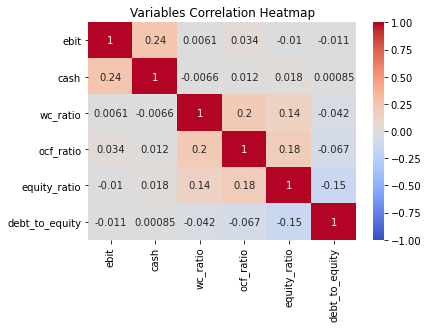

In [103]:
col = ['ebit', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity']
data = df_train[col]
print(data.head(10))
print(data.info())

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Variables Correlation Heatmap')
plt.show()

# Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset. Also we ran univariate logisitc regression to determine if the ratio is significant in a univariate sense (is not a K.O. criteria).

Our variables of interest are, so the variables we will put in our logistic regression, are :

- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt to Equity Ratio
- Cash

In [89]:
df_train

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,cf_investment,cf_financing,age_num,age_cat,ebit,total_liabilities,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,-1.112342e+06,-7520392.09,120.0,>59,6536077.55,1.136445e+07,5.142587,0.949635,0.738567,0.352444
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,1.174427e+06,1128108.08,44.0,40-49,38140.91,7.034964e+06,0.663710,-0.617484,0.389698,1.560542
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,-7.536444e+06,-22026.07,58.0,50-59,89799.80,8.457608e+06,3.328108,1.130863,0.000937,163.778649
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,-6.561222e+05,-169655.66,48.0,40-49,584315.02,2.793219e+06,3.193566,0.665113,0.592532,0.236311
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,-1.419776e+08,12567030.80,112.0,>59,25753000.00,6.044734e+08,0.102055,0.374604,0.417496,1.329259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,C_637,0,GmbH,82041,46410,1977,NaN,GKV,2.804500e+07,2.804500e+07,...,-2.581574e+05,845.29,43.0,40-49,374000.00,1.292400e+07,0.835583,0.026441,0.182336,4.484386
665,C_091,0,GmbH,85716,70210,2000,64.0,GKV,5.175343e+06,5.241814e+06,...,-4.270350e+04,77968.25,20.0,20-29,244694.05,9.117692e+05,1.213142,-0.475269,0.341823,1.925494
666,C_707,0,GmbH,85521,46693,2000,NaN,GKV,4.307021e+07,4.307021e+07,...,-4.940000e+05,-1400459.36,20.0,20-29,12876951.53,3.628583e+08,0.041927,0.009356,0.000000,0.000000
667,C_323,0,GmbH & Co. KG,82031,68320,2007,NaN,GKV,1.843728e+05,1.843728e+05,...,-2.630540e+03,-9788.00,13.0,10-19,9855.87,1.146466e+05,0.615002,0.220748,0.000000,0.000000


## Working Capital Ratio

AttributeError: module 'seaborn' has no attribute 'displot'

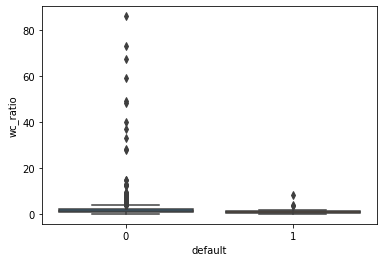

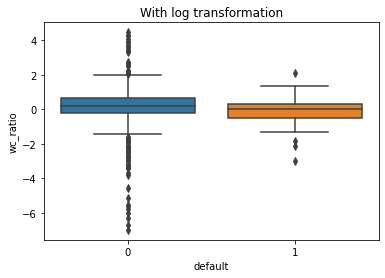

<Figure size 432x288 with 0 Axes>

In [90]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ wc_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Operating Cash Flow Ratio

AttributeError: module 'seaborn' has no attribute 'displot'

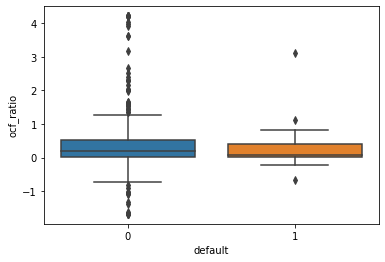

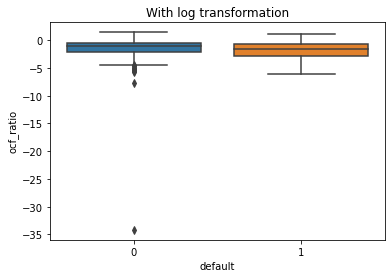

<Figure size 432x288 with 0 Axes>

In [91]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ocf_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Equity Ratio 

AttributeError: module 'seaborn' has no attribute 'displot'

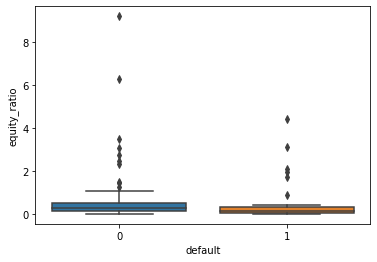

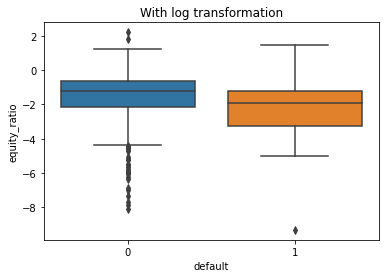

<Figure size 432x288 with 0 Axes>

In [92]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ equity_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [93]:
pd.crosstab(df_train["default"],df_train["equity_ratio"]==0) #see that 6 defaulted with an equity ratio of 0

equity_ratio,False,True
default,,
0,590,40
1,32,6


## Debt to Equity Ratio

AttributeError: module 'seaborn' has no attribute 'displot'

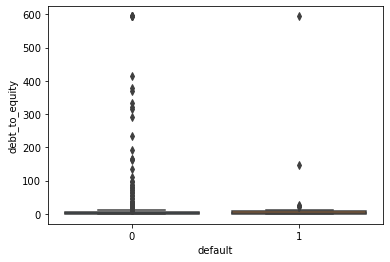

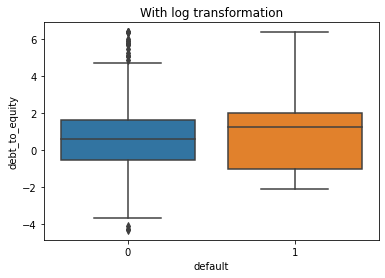

<Figure size 432x288 with 0 Axes>

In [94]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="debt_to_equity",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ debt_to_equity + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Cash

AttributeError: module 'seaborn' has no attribute 'displot'

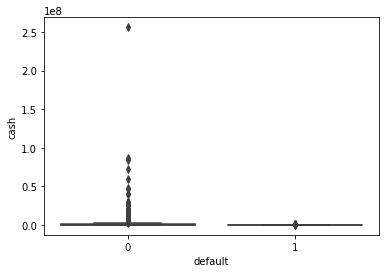

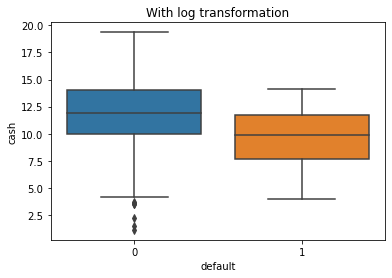

<Figure size 432x288 with 0 Axes>

In [95]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="cash",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ cash + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [ ]:
# See better histogram of cash
x = df_train[df_train["cash"] < df_train["cash"].quantile(0.95)]
sns.displot(x,x="cash",hue="default",stat="density",common_norm=False);
plt.figure()
sns.boxplot(y="cash",x="default",data=x);
plt.figure()
sns.boxplot(y=np.log(x["cash"]),x="default",
            data=x).set_title("With log transformation");


# Our Logit Regression

In [96]:
df_train

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,cf_investment,cf_financing,age_num,age_cat,ebit,total_liabilities,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,-1.112342e+06,-7520392.09,120.0,>59,6536077.55,1.136445e+07,5.142587,0.949635,0.738567,0.352444
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,1.174427e+06,1128108.08,44.0,40-49,38140.91,7.034964e+06,0.663710,-0.617484,0.389698,1.560542
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,-7.536444e+06,-22026.07,58.0,50-59,89799.80,8.457608e+06,3.328108,1.130863,0.000937,163.778649
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,-6.561222e+05,-169655.66,48.0,40-49,584315.02,2.793219e+06,3.193566,0.665113,0.592532,0.236311
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,-1.419776e+08,12567030.80,112.0,>59,25753000.00,6.044734e+08,0.102055,0.374604,0.417496,1.329259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,C_637,0,GmbH,82041,46410,1977,NaN,GKV,2.804500e+07,2.804500e+07,...,-2.581574e+05,845.29,43.0,40-49,374000.00,1.292400e+07,0.835583,0.026441,0.182336,4.484386
665,C_091,0,GmbH,85716,70210,2000,64.0,GKV,5.175343e+06,5.241814e+06,...,-4.270350e+04,77968.25,20.0,20-29,244694.05,9.117692e+05,1.213142,-0.475269,0.341823,1.925494
666,C_707,0,GmbH,85521,46693,2000,NaN,GKV,4.307021e+07,4.307021e+07,...,-4.940000e+05,-1400459.36,20.0,20-29,12876951.53,3.628583e+08,0.041927,0.009356,0.000000,0.000000
667,C_323,0,GmbH & Co. KG,82031,68320,2007,NaN,GKV,1.843728e+05,1.843728e+05,...,-2.630540e+03,-9788.00,13.0,10-19,9855.87,1.146466e+05,0.615002,0.220748,0.000000,0.000000


In [98]:
mdl1 = sm.Logit.from_formula('default ~ ebit + cash + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.075    
Dependent Variable: default          AIC:              269.9315 
Date:               2020-12-31 12:49 BIC:              301.1289 
No. Observations:   637              Log-Likelihood:   -127.97  
Df Model:           6                LL-Null:          -138.40  
Df Residuals:       630              LLR p-value:      0.0019371
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     12.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        -2.2407   0.2899 -7.7294 0.0000 -2.8089 -1.6725
ebit             -0.0000   0.0000 -0.2288 0.8190 -0.0000  0.0000
cash             -0.0000   0.0000 -1.9373 0.0527 -0.0000  0.0000
wc_ratio         -0.1567   0.1404 -1.1166 0.2642 -

In [100]:
y = df_train["default"]
X = df_train[["ebit","cash","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity"]]
X = X.fillna(0)
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.202204
         Iterations 12


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.074    
Dependent Variable: default          AIC:              284.1447 
Date:               2020-12-31 12:50 BIC:              315.6747 
No. Observations:   668              Log-Likelihood:   -135.07  
Df Model:           6                LL-Null:          -145.83  
Df Residuals:       661              LLR p-value:      0.0014783
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     12.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -2.2055   0.2779 -7.9371 0.0000 -2.7501 -1.6609
ebit             -0.0000   0.0000 -0.3694 0.7119 -0.0000  0.0000
cash             -0.0000   0.0000 -1.9299 0.0536 -0.0000  0.0000
wc_ratio         -0.1859   0.1431 -1.2992 0.1939 -0.4662  0.0945
ocf_ratio        -0.1906   0.2917 -0.6532 0.5136 -0.7624  0.3812
equity_ratio      0.2169   0.1786  1.2140 0.2248 -0.1333  0.5670
debt_to_equity    0.0009   0.0020  0.4474 0.6546 -0.0030  0.0047
================================================================

"""

In [101]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
285,0,36.49
648,0,22.51
139,1,21.00
450,0,20.06
504,0,17.52
...,...,...
440,0,0.00
432,0,0.00
410,0,0.00
394,0,0.00


In [102]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,5.58
43,1,8.06
69,1,8.76
104,1,11.13
114,1,3.99
120,1,7.73
128,1,8.32
139,1,21.00
150,1,14.31
198,1,8.42


NameError: name 'mdl1' is not defined

# PD Model preparation

## Dependent variabel: Good/Bad (default) definition

# PD model estimation

# PD model validation

## Out of sample validation (test)
### Evaluation of model performance: accuracy and area under the curve (AUC)
### Evalution of model performance: Gini

Test fabio